# Import Packages

In [22]:
import pandas as pd
import numpy as np
from plotnine import *
import geopandas as gpd
# import geoplot as gplt
import statsmodels.formula.api as sm
# repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [23]:
# load the data
demographics_problems_merged = pd.read_pickle('../data/clean_presented_problems.pkl')
demographics_problems_merged.head()

,Local ID,state_demographics,enrollment_date,enrollment_ym_derived,enrollment_year,disability_level,disability_level_ordered,presented_problems,Gender,Ethnicity
0,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,"aggression (physical, verbal, property destruc...",Female,Not of Hispanic origin
1,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,decrease in ability to participate in daily fu...,Female,Not of Hispanic origin
2,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,leaving unexpectedly,Female,Not of Hispanic origin
3,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,mental health symptoms,Female,Not of Hispanic origin
4,1021487,texas,2020-03-02,2020-03-01,2020,Mild,Mild,"aggression (physical, verbal, property destruc...",Male,Not of Hispanic origin


In [24]:
# creating new subset for people that presented aggression problems
demographics_aggression_problems = demographics_problems_merged[demographics_problems_merged["presented_problems"] == "aggression (physical, verbal, property destruction, threats)"].copy()

# verifying we subsetted correctly
demographics_aggression_problems["presented_problems"].value_counts()

aggression (physical, verbal, property destruction, threats)    3929
Name: presented_problems, dtype: int64

In [25]:
demographics_aggression_problems['disability_level_ordered'].value_counts()
demographics_aggression_problems['Gender'].value_counts()
demographics_aggression_problems['Ethnicity'].value_counts()

demographics_aggression_problems.groupby("Gender")['disability_level_ordered'].value_counts()

demographics_aggression_problems.groupby("disability_level_ordered")['state_demographics'].value_counts()


Mild                   1777
Moderate               1286
Severe                  328
Normal intelligence     271
Borderline              210
Profound                 56
Name: disability_level_ordered, dtype: int64

Male      2724
Female    1205
Name: Gender, dtype: int64

Not of Hispanic origin                      2993
Hispanic - specific origin not specified     644
Unknown, not collected                       292
Name: Ethnicity, dtype: int64

Gender                     
Female  Mild                    622
        Moderate                387
        Severe                   88
        Borderline               49
        Normal intelligence      47
        Profound                 12
Male    Mild                   1155
        Moderate                899
        Severe                  240
        Normal intelligence     224
        Borderline              161
        Profound                 44
Name: disability_level_ordered, dtype: int64

disability_level_ordered  state_demographics
Normal intelligence       new york              129
                          north carolina         94
                          california             36
                          texas                   7
                          new hampshire           5
Borderline                new york              111
                          north carolina         27
                          california             25
                          new hampshire          22
                          texas                  15
                          iowa                   10
Mild                      new york              885
                          north carolina        360
                          new hampshire         193
                          texas                 156
                          california             94
                          iowa                   79
                          colorado               10
Moderate           

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People with Aggression Problems by Disability Level Over Time (by Month-Year)')

<AxesSubplot:title={'center':'Total Number of People with Aggression Problems by Disability Level Over Time (by Month-Year)'}, xlabel='Enrollment Year', ylabel='Count'>

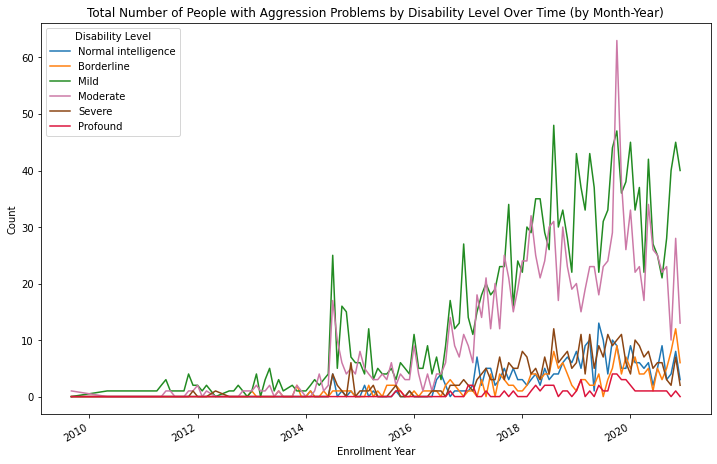

In [26]:
# define a dictionary of colors for each disability level
colors = {'Normal intelligence': '#1f77b4', 'Borderline': '#ff7f0e', 'Mild': '#228B22', 'Moderate': '#CC79A7', 'Severe': '#8B4513', 'Profound': '#DC143C'}

# line plot of the total number of people for each disability level over time (by month-year)
plot_by_ym = demographics_aggression_problems.groupby('enrollment_ym_derived')['disability_level_ordered'].value_counts().unstack().fillna(0).plot(figsize=(12, 8), color=colors.values())

plot_by_ym.set_xlabel("Enrollment Year")
plot_by_ym.set_ylabel("Count")
plot_by_ym.legend(title="Disability Level", labels=colors.keys())
plot_by_ym.set_title("Total Number of People with Aggression Problems by Disability Level Over Time (by Month-Year)")
plot_by_ym

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People with Aggression Problems by Disability Level Over Time (by Year)')

<AxesSubplot:title={'center':'Total Number of People with Aggression Problems by Disability Level Over Time (by Year)'}, xlabel='Enrollment Year', ylabel='Count'>

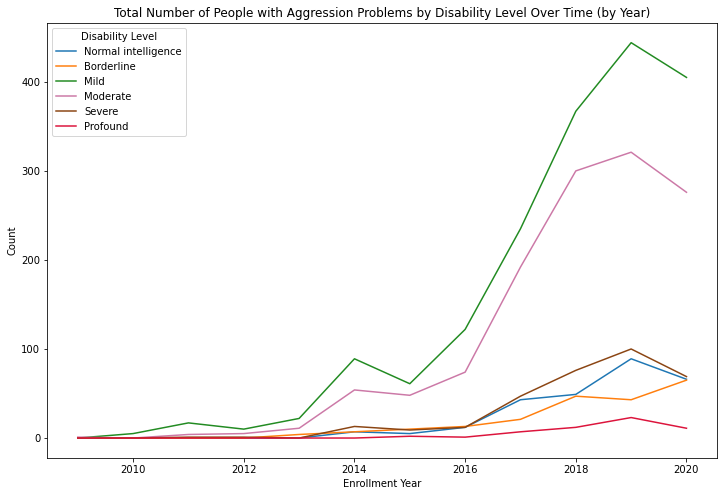

In [27]:
# line plot of the total number of people for each aggression level by year
plot_by_y = demographics_aggression_problems.groupby('enrollment_year')['disability_level_ordered'].value_counts().unstack().fillna(0).plot(figsize=(12, 8), color=colors.values())
plot_by_y.set_xlabel("Enrollment Year")
plot_by_y.set_ylabel("Count")
plot_by_y.legend(title="Disability Level")
plot_by_y.set_title("Total Number of People with Aggression Problems by Disability Level Over Time (by Year)")
plot_by_y


Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People by Gender Over Time (by Month-Year)')

<AxesSubplot:title={'center':'Total Number of People by Gender Over Time (by Month-Year)'}, xlabel='Enrollment Year', ylabel='Count'>

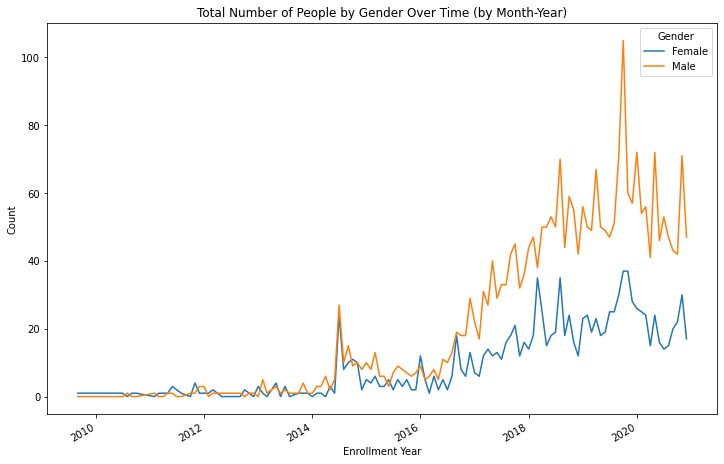

In [28]:
# line plot of the total number of people for each aggression level by year
gender_by_ym = demographics_aggression_problems.groupby('enrollment_ym_derived')['Gender'].value_counts().unstack().fillna(0).plot(figsize=(12, 8))
gender_by_ym.set_xlabel("Enrollment Year")
gender_by_ym.set_ylabel("Count")
gender_by_ym.legend(title="Gender")
gender_by_ym.set_title("Total Number of People by Gender Over Time (by Month-Year)")
gender_by_ym

Text(0.5, 0, 'Enrollment Year')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Total Number of People by Gender Over Time (by Year)')

<AxesSubplot:title={'center':'Total Number of People by Gender Over Time (by Year)'}, xlabel='Enrollment Year', ylabel='Count'>

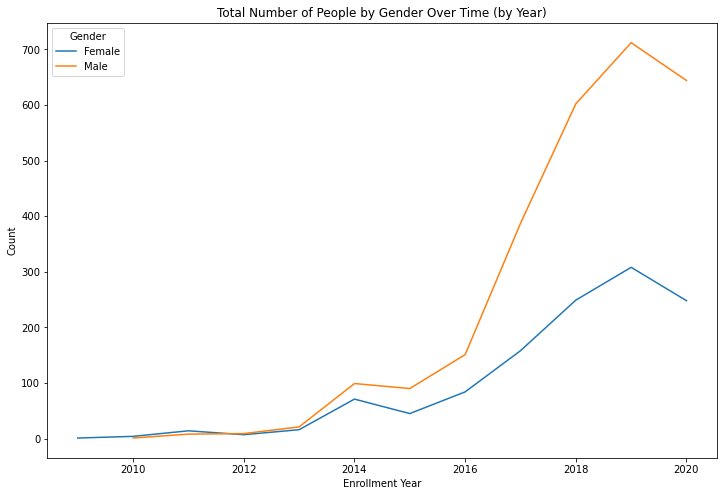

In [29]:
gender_by_ym = demographics_aggression_problems.groupby('enrollment_year')['Gender'].value_counts().unstack().plot(figsize=(12, 8))
gender_by_ym.set_xlabel("Enrollment Year")
gender_by_ym.set_ylabel("Count")
gender_by_ym.legend(title="Gender")
gender_by_ym.set_title("Total Number of People by Gender Over Time (by Year)")
gender_by_ym

<AxesSubplot:xlabel='enrollment_year'>

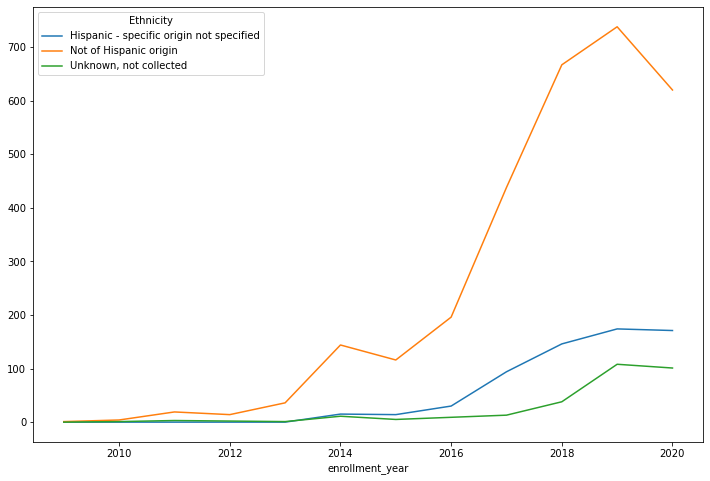

In [30]:
demographics_aggression_problems.groupby('enrollment_year')['Ethnicity'].value_counts().unstack().fillna(0).plot(figsize=(12, 8))

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Level by Gender')

<AxesSubplot:title={'center':'Proportion of Disability Level by Gender'}, xlabel='Gender', ylabel='Proportion'>

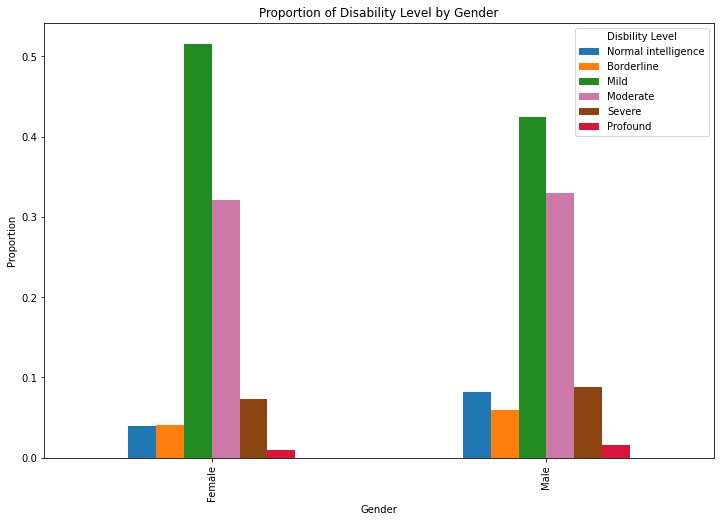

In [31]:
# Disability level by gender
disability_by_gender = demographics_aggression_problems.groupby("Gender")['disability_level_ordered'].value_counts(normalize = True).unstack().plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_by_gender.set_ylabel("Proportion")
disability_by_gender.legend(title="Disbility Level")
disability_by_gender.set_title("Proportion of Disability Level by Gender")
disability_by_gender

Text(0.5, 0, 'Enrollment Year, Gender')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Level by Gender for 2019 and 2020')

<AxesSubplot:title={'center':'Proportion of Disability Level by Gender for 2019 and 2020'}, xlabel='Enrollment Year, Gender', ylabel='Proportion'>

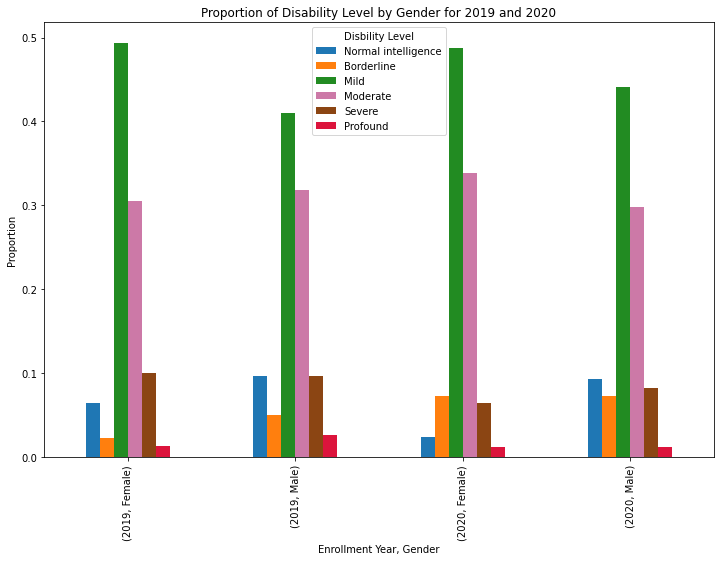

In [32]:
temp = demographics_aggression_problems[demographics_aggression_problems.enrollment_year > 2018]
disability_after_2018 = temp.groupby(['enrollment_year', 'Gender'])['disability_level_ordered'].value_counts(normalize=True).unstack().fillna(0).plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_after_2018.set_xlabel("Enrollment Year, Gender")
disability_after_2018.set_ylabel("Proportion")
disability_after_2018.legend(title="Disbility Level")
disability_after_2018.set_title("Proportion of Disability Level by Gender for 2019 and 2020")
disability_after_2018

Text(0.5, 0, 'State')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Levels by State for People with Aggression Problems')

<AxesSubplot:title={'center':'Proportion of Disability Levels by State for People with Aggression Problems'}, xlabel='State', ylabel='Proportion'>

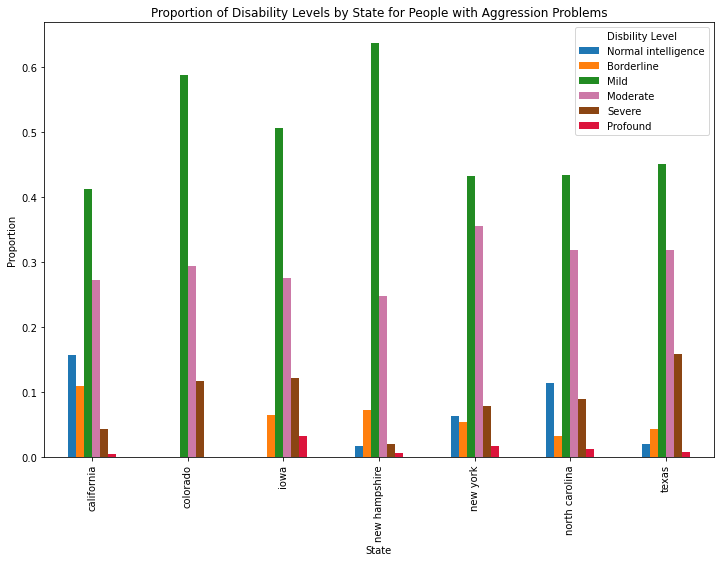

In [33]:
disability_by_state = demographics_aggression_problems.groupby(['state_demographics'])["disability_level_ordered"].value_counts(normalize=True).unstack().fillna(0).plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_by_state.set_xlabel("State")
disability_by_state.set_ylabel("Proportion")
disability_by_state.legend(title="Disbility Level")
disability_by_state.set_title("Proportion of Disability Levels by State for People with Aggression Problems")
disability_by_state

Text(0.5, 0, 'State')

Text(0, 0.5, 'Proportion')

Text(0.5, 1.0, 'Proportion of Disability Levels by State for People for the Entire Dataset')

<AxesSubplot:title={'center':'Proportion of Disability Levels by State for People for the Entire Dataset'}, xlabel='State', ylabel='Proportion'>

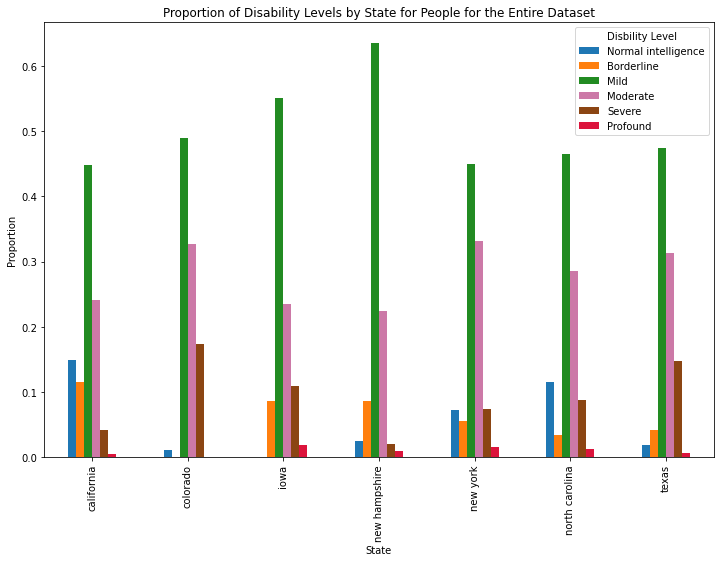

In [34]:
## the demographics merged dataset before subsetting to aggression problems
disability_by_state_full_dataset = demographics_problems_merged.groupby(['state_demographics'])["disability_level_ordered"].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(12, 8), color=colors.values())
disability_by_state_full_dataset.set_xlabel("State")
disability_by_state_full_dataset.set_ylabel("Proportion")
disability_by_state_full_dataset.legend(title="Disbility Level")
disability_by_state_full_dataset.set_title("Proportion of Disability Levels by State for People for the Entire Dataset")
disability_by_state_full_dataset

In [35]:
# subset to people with mild disability level that have agression issues
mild_aggression_problems = demographics_aggression_problems[demographics_aggression_problems['disability_level'] == 'Mild'].copy()

In [36]:
# create dataframe with count of people with mild disability level that have agression issues
aggression_mild_df = pd.DataFrame(mild_aggression_problems.groupby("enrollment_year").agg({"Local ID":"count"})).reset_index()
aggression_mild_df 

,enrollment_year,Local ID
0,2010,5
1,2011,17
2,2012,10
3,2013,22
4,2014,89
5,2015,61
6,2016,122
7,2017,235
8,2018,367
9,2019,444


In [37]:
# subset to people with mild disability level from general dataframe
mild_df = demographics_problems_merged[demographics_problems_merged['disability_level'] == 'Mild'].copy()
mild_df.head()

,Local ID,state_demographics,enrollment_date,enrollment_ym_derived,enrollment_year,disability_level,disability_level_ordered,presented_problems,Gender,Ethnicity
0,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,"aggression (physical, verbal, property destruc...",Female,Not of Hispanic origin
1,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,decrease in ability to participate in daily fu...,Female,Not of Hispanic origin
2,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,leaving unexpectedly,Female,Not of Hispanic origin
3,000083W,north carolina,2018-06-27,2018-06-01,2018,Mild,Mild,mental health symptoms,Female,Not of Hispanic origin
4,1021487,texas,2020-03-02,2020-03-01,2020,Mild,Mild,"aggression (physical, verbal, property destruc...",Male,Not of Hispanic origin


In [38]:
# create dataframe with count of people with mild disability level
gen_mild_df = pd.DataFrame(mild_df.groupby("enrollment_year").agg({"Local ID":"count"})).reset_index()
gen_mild_df 

,enrollment_year,Local ID
0,2010,24
1,2011,93
2,2012,50
3,2013,122
4,2014,338
5,2015,238
6,2016,512
7,2017,983
8,2018,1561
9,2019,1997


In [39]:
# merge both dattaframes with counts
mild_merged_df =  aggression_mild_df.merge(gen_mild_df, left_on='enrollment_year', right_on='enrollment_year',
                                                                  how='inner', suffixes=('_agression', '_general'), 
                                                                  indicator = True).drop_duplicates()
mild_merged_df

,enrollment_year,Local ID_agression,Local ID_general,_merge
0,2010,5,24,both
1,2011,17,93,both
2,2012,10,50,both
3,2013,22,122,both
4,2014,89,338,both
5,2015,61,238,both
6,2016,122,512,both
7,2017,235,983,both
8,2018,367,1561,both
9,2019,444,1997,both


In [40]:
# create new variable in merged df for percent of people with mild disability level that have agression issues
mild_merged_df["mild_perc"] = mild_merged_df['Local ID_agression'] / mild_merged_df['Local ID_general']
mild_merged_df

,enrollment_year,Local ID_agression,Local ID_general,_merge,mild_perc
0,2010,5,24,both,0.208333
1,2011,17,93,both,0.182796
2,2012,10,50,both,0.200000
3,2013,22,122,both,0.180328
4,2014,89,338,both,0.263314
5,2015,61,238,both,0.256303
6,2016,122,512,both,0.238281
7,2017,235,983,both,0.239064
8,2018,367,1561,both,0.235106
9,2019,444,1997,both,0.222334


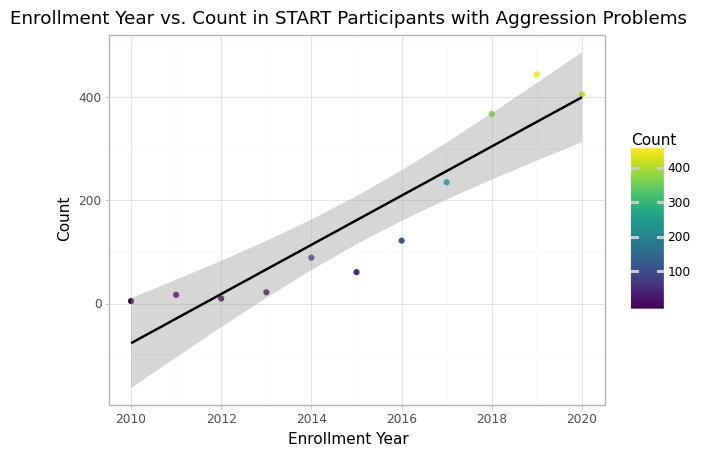

<ggplot: (8775458774483)>

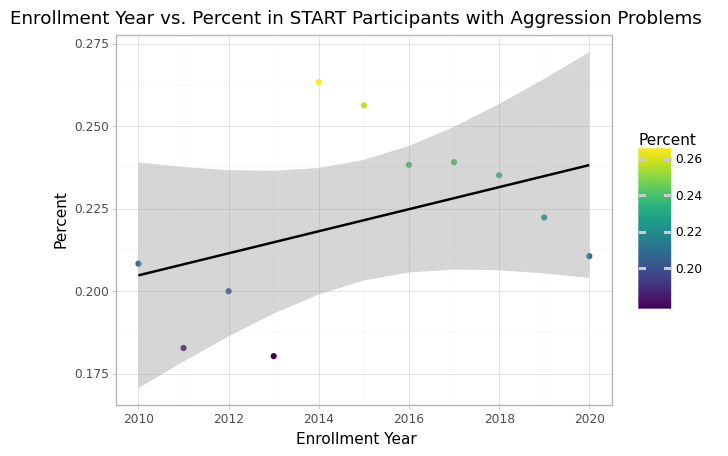

<ggplot: (8775458806369)>

In [41]:
def make_smoothed_plot(df, y_var, y_label):
        return (ggplot(df, aes(x = "enrollment_year", y = y_var, color = y_var))
                + geom_point()
                + geom_smooth(method = "lm")
                + labs(x = 'Enrollment Year', y = y_label, color = y_label,
                       title = "Enrollment Year vs. " + y_label + " in START Participants with Aggression Problems")
                + theme_light()
                + scale_x_continuous(breaks=(2010, 2012, 2014, 2016, 2018, 2020)))
        
make_smoothed_plot(aggression_mild_df, 'Local ID', 'Count')                                                                                                                                                                                                                     
make_smoothed_plot(mild_merged_df, 'mild_perc', 'Percent')

In [42]:
demographics_aggression_problems['disability_level_num']= [pd.to_numeric(ele) for ele in demographics_aggression_problems['disability_level']]
# df['col_name'] = pd.to_numeric(df['col_name'])

ValueError: Unable to parse string "Mild" at position 0

In [ ]:
result = sm.ols(formula="disability_level ~ enrollment_year", data=demographics_aggression_problems).fit()

ValueError: endog has evaluated to an array with multiple columns that has shape (3928, 6). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

In [ ]:
file = '/Users/esmer1/Desktop/qss20folder/qss_final_project/code/NYS_Civil_Boundaries/counties.shp'
ny_counties =  gpd.read_file(gplt.datasets.get_path(file))

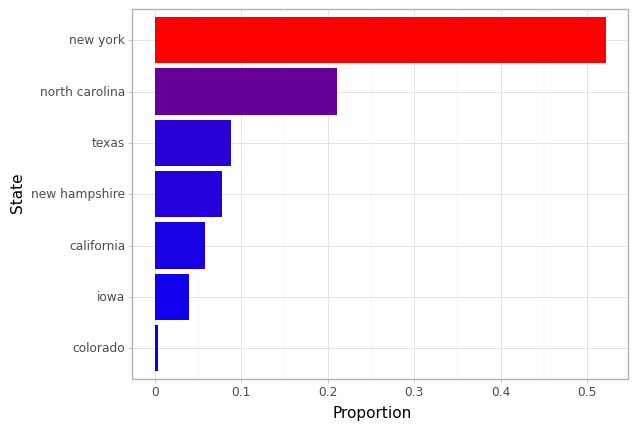

<ggplot: (8775569347142)>

In [ ]:
temp = pd.DataFrame(demographics_aggression_problems['state_demographics'].value_counts(normalize=True)).reset_index()
temp['index'] = temp['index'].astype('category')
(ggplot(temp, aes(x = 'reorder(index, state_demographics)', y = 'state_demographics', fill = 'state_demographics'))
            + geom_col()
            + coord_flip()
            + scale_fill_gradient(low='blue', high='red')
            + labs(x = 'State', y = 'Proportion')
            + theme_light()
            + theme(legend_position='none'))